In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from utils import lp3_ppf, lp3_cdf, lp3_pdf
from post_process import PostProcess
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter

font_size = 14
label_font_size = 18

font_style = "Arial"
mpl.rcParams['font.family'] = font_style
mpl.rcParams['font.size'] = font_size 

# Harricana River

## Load systematic data

In [2]:
annual_maxima_csv = r"C:\ISYE6420\Homework\Project\data\Harricana_River_at_Amos.csv"

df = pd.read_csv(annual_maxima_csv)
df["zstd"] = -norm.ppf(df["Plotting_Position"])
data = df["Flow"].to_xarray()

## Define quantiles for calculation

In [3]:
quantiles = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 
             0.9, 0.95, 0.98, 0.99, 0.995, 0.998, 0.999, 0.9995, 0.9998,
             0.9999, 0.99995, 0.99998, 0.99999, 0.999995, 0.999998, 
             0.999999] 

x_values_z_scores = [-norm.ppf(1 - x) for x in quantiles]

In [4]:
# Load the samples
samples = np.load(r'C:\ISYE6420\Homework\Project\data\HRA\HRA_bayesian_lp3_samples.npy')

# Reshape to 2D: Combine iterations and chains
reshaped_samples = samples.reshape(-1, 3)

## Posterior mode

In [5]:
samples_csv = r"C:\ISYE6420\Homework\Project\data\HRA\HRA_bayesian_lp3_summaries.csv"
summaries_lp3 = pd.read_csv(samples_csv)
posterior_mode = summaries_lp3.loc[summaries_lp3['LogLikelihood'].idxmax()]
mu_lp3 = posterior_mode['mu']
sigma_lp3 = posterior_mode['sigma']
gamma_lp3 = posterior_mode['gamma']
print("\nPosterior mode:\n")
print(f"mu: {mu_lp3}")
print(f"sigma: {sigma_lp3}")
print(f"gamma: {gamma_lp3}")


Posterior mode:

mu: 2.2692091008321893
sigma: 0.1062436505363364
gamma: -0.0187100989468634


In [6]:
# Calculate the quantiles for the LP3 distribution
flood_quantiles_lp3 = [lp3_ppf(q, mu=mu_lp3, sigma=sigma_lp3, gamma_val=gamma_lp3) for q in quantiles]

## Posterior predictive and credible intervals

In [7]:
df_samples = pd.read_csv(samples_csv)
pp = PostProcess(df_samples, quantiles)
df_posterior = pp.calculate_posterior_predictive_and_CI_df()
df_posterior

,quantile,posterior_predictive,percentile_5,percentile_95
0,0.010000,102.098411,91.894793,112.936255
1,0.020000,110.210162,100.196529,119.711282
2,0.050000,122.740462,113.426812,131.027040
3,0.100000,134.907140,126.092710,142.381037
4,0.200000,150.938378,142.548401,157.947854
5,0.300000,163.350369,155.239751,170.575445
6,0.500000,186.618510,177.822687,194.209638
7,0.700000,213.063692,202.558504,222.091196
8,0.800000,230.323418,218.554350,241.532078
9,0.900000,257.271667,242.055021,272.085535


In [8]:
# Assign the values to variables
posterior_predictive = df_posterior["posterior_predictive"].values
lower_ci = df_posterior["percentile_5"].values
upper_ci = df_posterior["percentile_95"].values

In [9]:
samples_csv_noise = r"C:\ISYE6420\Homework\Project\data\HRA\HRA_bayesian_lp3_summaries_noise_testing.csv"
df_samples_noise = pd.read_csv(samples_csv_noise)
pp_noise = PostProcess(df_samples_noise, quantiles)
df_posterior_noise = pp_noise.calculate_posterior_predictive_and_CI_df()
df_posterior_noise

,quantile,posterior_predictive,percentile_5,percentile_95
0,0.010000,102.214118,90.967112,113.143585
1,0.020000,110.202832,99.578490,119.221125
2,0.050000,122.719694,113.368856,129.431032
3,0.100000,134.769926,126.541317,139.954451
4,0.200000,150.459005,143.649065,155.472076
5,0.300000,163.168835,156.725873,168.587916
6,0.500000,185.708449,178.786219,193.870611
7,0.700000,212.791980,202.195203,223.686090
8,0.800000,230.059566,217.561621,244.663384
9,0.900000,258.255396,240.413116,278.284625


In [10]:
# Assign the values to variables
posterior_predictive_noise = df_posterior_noise["posterior_predictive"].values
lower_ci_noise = df_posterior_noise["percentile_5"].values
upper_ci_noise = df_posterior_noise["percentile_95"].values

## Load bestfit result

In [11]:
mu_lp3_bestfit = 2.26930209
sigma_lp3_bestfit = 0.106660114
gamma_lp3_bestfit = -0.020521939

In [12]:
output_csv = r"C:\ISYE6420\Homework\Project\data\HRA\HRA_bestfit_output_ffc.csv"

df_bestfit = pd.read_csv(output_csv)

bestfit_aep = df_bestfit["AEP"].values
bestfit_aep = bestfit_aep[~np.isnan(bestfit_aep)]
bestfit_z_scores = [-norm.ppf(x) for x in bestfit_aep]

bestfit_mode = df_bestfit["Posterior Mode"].values
bestfit_mode = bestfit_mode[~np.isnan(bestfit_mode)]

bestfit_predicitive = df_bestfit["Posterior Predictive"].values
bestfit_predicitive = bestfit_predicitive[~np.isnan(bestfit_predicitive)]

bestfit_5CI = df_bestfit["5.0% CI"].values
bestfit_5CI = bestfit_5CI[~np.isnan(bestfit_5CI)]

bestfit_95CI = df_bestfit["95.0% CI"].values
bestfit_95CI = bestfit_95CI[~np.isnan(bestfit_95CI)]

## Plot distribution

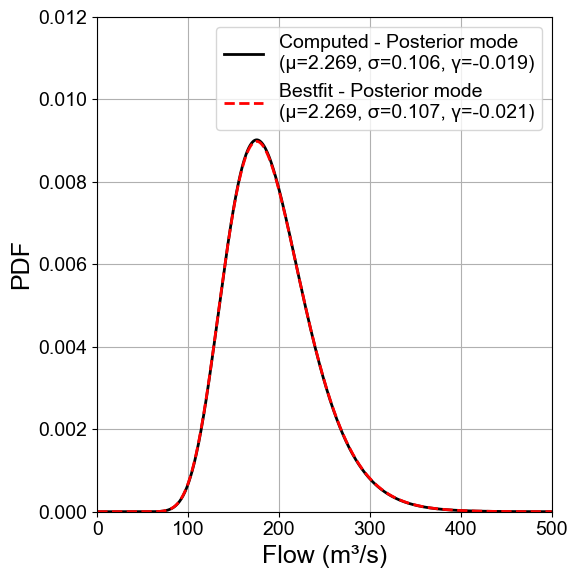

In [13]:
x_values = np.linspace(0.01, 500, 1000)
lp3_pdf_values = lp3_pdf(x_values, mu=mu_lp3, sigma=sigma_lp3, gamma_val=gamma_lp3)
lp3_pdf_values_bestfit = lp3_pdf(x_values, mu=mu_lp3_bestfit, sigma=sigma_lp3_bestfit, gamma_val=gamma_lp3_bestfit)

# Plotting the PDF
plt.figure(figsize=(6, 6))
plt.plot(x_values, lp3_pdf_values, 
         color = "black",  linewidth=2,
         label=f"Computed - Posterior mode\n(μ={mu_lp3:.3f}, σ={sigma_lp3:.3f}, γ={gamma_lp3:.3f})")
plt.plot(x_values, lp3_pdf_values_bestfit, 
         color = "red", linestyle='--', linewidth=2,
         label=f"Bestfit - Posterior mode\n(μ={mu_lp3_bestfit:.3f}, σ={sigma_lp3_bestfit:.3f}, γ={gamma_lp3_bestfit:.3f})")

plt.xlim(0, 500)
plt.ylim(0, 0.012)
plt.xlabel("Flow (m³/s)", fontsize=label_font_size, fontname=font_style)
plt.ylabel("PDF", fontsize=label_font_size, fontname=font_style)
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.savefig(r"C:\ISYE6420\Homework\Project\data\HRA\HRA_LP3_comparison.png", dpi=300)

## Plot flood frequency curve

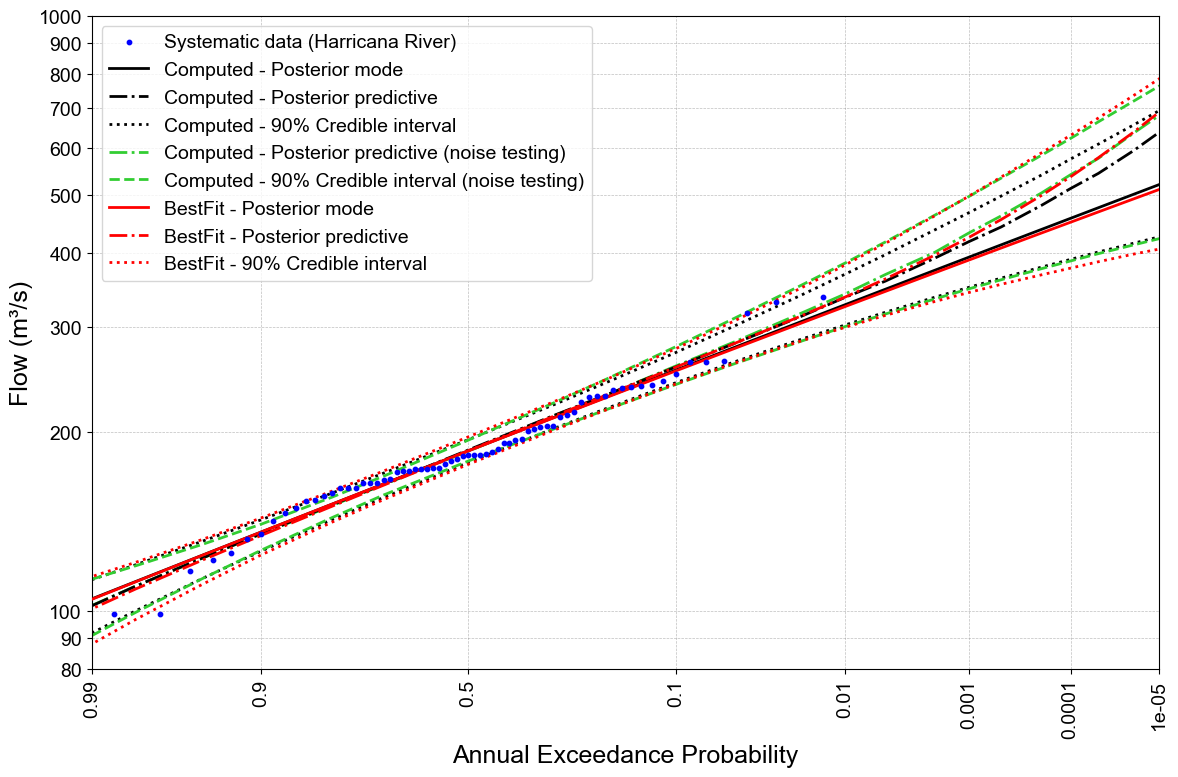

In [14]:
plt.figure(figsize=(12, 8))

plt.scatter(df['zstd'], df['Flow'], 
            s=10, color='blue', label='Systematic data (Harricana River)', zorder=10)

plt.plot(x_values_z_scores, flood_quantiles_lp3, 
         color = "black", linewidth=2,
         label=f"Computed - Posterior mode")

plt.plot(x_values_z_scores, posterior_predictive, 
         color = "black", linestyle='-.', linewidth=2,
         label=f"Computed - Posterior predictive", zorder = 8)

plt.plot(x_values_z_scores, lower_ci, 
         color = "black", linestyle='dotted', linewidth=2,
         label = "Computed - 90% Credible interval")

plt.plot(x_values_z_scores, upper_ci, 
         color = "black", linestyle='dotted', linewidth=2)

plt.plot(x_values_z_scores, posterior_predictive_noise,
            color = "limegreen",  linestyle='-.', linewidth=2,
            label = "Computed - Posterior predictive (noise testing)")

plt.plot(x_values_z_scores, lower_ci_noise, 
         color = "limegreen", linestyle='--', linewidth=2,
         label = "Computed - 90% Credible interval (noise testing)")

plt.plot(x_values_z_scores, upper_ci_noise, 
         color = "limegreen", linestyle='--', linewidth=2)

plt.plot(bestfit_z_scores, bestfit_mode, 
         color = "red",  linewidth=2,
         label=f"BestFit - Posterior mode", zorder = 9)

plt.plot(bestfit_z_scores, bestfit_predicitive, 
         color = "red", linestyle='-.', linewidth=2,
         label=f"BestFit - Posterior predictive", zorder = 9)

plt.plot(bestfit_z_scores, bestfit_5CI, 
         color = "red", linestyle='dotted', linewidth=2,
         label=f"BestFit - 90% Credible interval", zorder = 9)

plt.plot(bestfit_z_scores, bestfit_95CI, 
         color = "red", linestyle='dotted', linewidth=2, zorder = 9)

# cut off values for major ticks, and their corresponding z-scores
aep_lst = [0.99, 0.9, 0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001]
major_z_scores = [-norm.ppf(aep) for aep in aep_lst]
x_ticks = [str(aep) for aep in aep_lst]

plt.xticks(major_z_scores, x_ticks, rotation = 90)
plt.grid(which='both', color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

plt.yscale('log')
y_values = [80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
y_ticks = [str(i) for i in y_values]
plt.yticks(y_values, y_ticks)

plt.xlim(major_z_scores[0], major_z_scores[-1])
plt.ylim(y_values[0], y_values[-1])

ax = plt.gca()
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter) 

# set labels for x and y axes
plt.xlabel('Annual Exceedance Probability', fontsize=label_font_size, fontname=font_style)
plt.ylabel("Flow (m³/s)", fontsize=label_font_size, fontname=font_style)
plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig(r"C:\ISYE6420\Homework\Project\data\HRA\HRA_bayesian_flood_quantiles_lp3.png", dpi=300)